# Discovering Accounts to Follow Using Graph Mining

Lots of things can be represented as graphs. This is particularly true in this day of Big Data, online social networks, and the Internet of Things. In particular, online social networks are big business, with sites such as Facebook that have over 500 million active users (50 percent of them log in each day). These sites often monetize themselves by targeted advertising. However, for users to be engaged with a website, they often need to follow interesting people or pages.

In this chapter, we will look at the concept of similarity and how we can create graphs based on it. We will also see how to split this graph up into meaningful subgraphs using connected components. This simple algorithm introduces the concept of cluster analysis—splitting a dataset into subsets based on similarity. We will investigate cluster analysis in more depth in Chapter 10, Clustering News Articles.

The topics covered in this chapter include:
- Creating graphs from social networks
- Loading and saving built classifiers
- The NetworkX package
- Converting graphs to matrices
- Distance and similarity
- Optimizing parameters based on scoring functions
- Loss functions and scoring functions

## Creating a graph & building the network
Our task is to recommend users on online social networks based on shared connections. Our logic is that if two users have the same friends, they are highly similar and worth recommending to each other.

We are going to create a small social graph from fake Twitter users. The data we are looking for is a subset of users interested in a similar topic (again, the Python programming language) and a list of all of their friends (people they follow). With this data, we will check how similar two users are, based on how many friends they have in common.

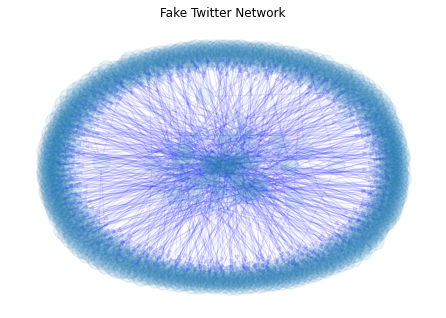

Number of nodes: 1050
Number of edges: 950
Average degree: {5: 1.0, 1: 0.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0}


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Create empty graph
G = nx.DiGraph()

# Function to add nodes with followers
def add_user(G, num_followers):
    user_id = len(G.nodes())
    G.add_node(user_id, name=f"User {user_id}")
    
    # Add followers
    for _ in range(num_followers):
        follower_id = len(G.nodes())
        G.add_node(follower_id, name=f"User {follower_id}")
        G.add_edge(user_id, follower_id)

# Generate graph with ~100 users and ~500 edges
for i in range(100):  
    add_user(G, 5 + (i % 10))  # Vary number of followers per user

# Set up edge attributes
for u, v in G.edges():
    G[u][v]['weight'] = 1

# Visualize graph
pos = nx.spring_layout(G)
nx.draw(G, alpha=0.1, edge_color='b')

plt.title("Fake Twitter Network")
plt.axis('off')
plt.show()

# Print graph stats
print(f"Number of nodes: {len(G.nodes())}")
print(f"Number of edges: {len(G.edges())}")
print(f"Average degree: {nx.average_degree_connectivity(G)}")


## Creating a similarity graph

Our task is recommendation through shared friends. As mentioned previously, our logic is that, if two users have the same friends, they are highly similar. We could recommend one user to the other on this basis.

We are therefore going to take our existing graph (which has edges relating to friendship) and create a new graph. The nodes are still users, but the edges are going to be weighted edges. A weighted edge is simply an edge with a weight property. The logic is that a higher weight indicates more similarity between the two nodes
than a lower weight. This is context-dependent. If the weights represent distance, then the lower weights indicate more similarity.

For our application, the weight will be the similarity of the two users connected
by that edge (based on the number of friends they share). This graph also has the
property that it is not directed. This is due to our similarity computation, where the
similarity of user A to user B is the same as the similarity of user B to user A.

There are many ways to compute the similarity between two lists like this.
For example, we could compute the number of friends the two have in common.
However, this measure is always going to be higher for people with more friends.
Instead, we can normalize it by dividing by the total number of distinct friends the
two have. This is called the Jaccard Similarity.

The Jaccard Similarity, always between 0 and 1, represents the percentage overlap of
the two. As we saw in Chapter 2, Classifying with scikit-learn Estimators, normalization
is an important part of data mining exercises and generally a good thing to do
(unless you have a specific reason not to).

To compute this Jaccard similarity, we divide the intersection of the two sets of
followers by the union of the two. These are set operations and we have lists,
so we will need to convert the friends lists to sets first. The code is as follows:

In [33]:
def compute_similarity(friends1, friends2):
    if len(friends1 | friends2) == 0:
        return 0
    return len(friends1 & friends2) / len(friends1 | friends2)

def create_graph(friends, threshold=0):
    G = nx.DiGraph()
    weights = []
    for user1 in friends.keys():
        for user2 in friends.keys():
            if user1 == user2:
                continue
            weight = compute_similarity(friends[user1], friends[user2])
            weights.append(weight)
            if weight >= threshold:
                G.add_node(user1)
                G.add_node(user2)
                G.add_edge(user1, user2, weight=weight)
    return G

friends = {}
for v in G.adjacency():
    user = v[0]
    friend_list = v[1].keys()
    friends[user] = friend_list

G = create_graph(friends)

KeyboardInterrupt: 

In [31]:

%matplotlib inline
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)

edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edgewidth)

# Print graph stats
print(f"Number of nodes: {len(G.nodes())}")
print(f"Number of edges: {len(G.edges())}")
print(f"Average degree: {nx.average_degree_connectivity(G)}")

Number of nodes: 1050
Number of edges: 550725
Average degree: {1049: 1049.0}
Error in callback <function flush_figures at 0x7fe37512e510> (for post_execute):


KeyboardInterrupt: 